# Exercícios 1 e 3 (tarefa para retorno 1)

### Ex. 1: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.


**Explicação:** aqui iremos verificar se a sobrevivência tem relação direta com o sexo do passageiro, ou seja, a taxa de mulheres sobreviventes foi maior do que a de homens? 

É importante ter sempre em mente a hipótese que queremos testar, nesse caso pode ser por exemplo: 

    - h0 = a taxa de sobrevivência tem relação direta com o sexo do passageiro. (Hipótese nula)
    - h1 = a taxa de sobrevivência não tem relação direta com o sexo do passageiro. (Hipótese alternativa)

Aqui estamos estudando duas variáveis categóricas: survived = 0 ou 1 e sex = male ou female, por isso podemos usar o chi-quadrado.

O chi-quadrado tem como princípio básico comparar proporções, ou seja, possíveis divergências entre as frequências observadas e esperadas para um certo evento.


**Etapas básicas:**

- Carregar os dados titanic.csv;
- Analisar a tabela;
- Estudar a relação entre as variáveis survived e sex;
    - Criar diferentes gráficos
    - Calcular chi-quadrado
    

Obs.: Todos os códigos são correspondentes aos códigos vistos em aula!

#### a) Carregar bibliotecas e os dados

In [1]:
# Bibliotecas essenciais

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")

print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No conjunto de dados titanic temos 891 linhas (observações) e 12 colunas (características)

#### b) Calcular a probabilidade de sobreviver sendo homem e sendo mulher

In [4]:
# Codigo explicado:
# df[(df.Survived==1) & ( df.Sex=='male')].shape[0] => quantidade de homens que sobreviveram
# df[df.Sex=='male'].shape[0] => quantidade total de homens
# round(prob_h,2) => arredonda o numero assumindo 2 casas decimais 
# *100 => multiplica o valor decimal por 100 para obter em porcentagem

prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", (round(prob_homem,2)*100)) 
print("Probabilidade de sobreviver sendo mulher:", (round(prob_mulher,2)*100))

Probabilidade de sobreviver sendo homem: 19.0
Probabilidade de sobreviver sendo mulher: 74.0


**Qual sua conclusão a partir dos dados acima?**

A probabilidade de homens sobreviver ser menor, uns dos motivos acima se deve o número de homens ser maior que o das mulheres.

<br>

**Você vê algum indicativo de relação entre ter sobrevivido e o sexo?**

Sim é possível observar uma relação entre ter sobrevivido e o sexo devido a proporção de sobreviventes ser diferente entre os sexos.

<br>

In [5]:
# Usando o código abaixo você consegue obter a quantidade de mulheres e homens que sobreviveram (1) e morreram (0)
# Gera tabela de frequencia absoluta!

df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

,0,1
Sex,,
female,81,233
male,468,109


In [6]:
# Com uma simples modificação no código acima você passa a ter os valores em percentual
# Gera tabela de frequencia relativa!

df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


#### c) Construção de gráfico

Estude o código abaixo!

Todo o código foi demonstrado durante a aula!

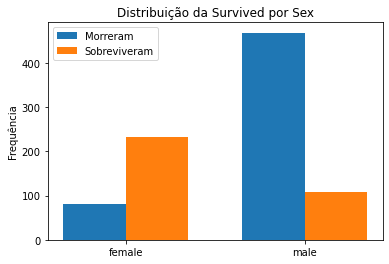

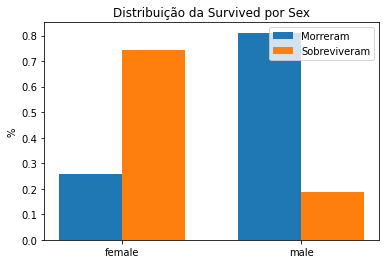

In [7]:
# Codigo apresentado em aula!

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

labels = list(df_sex.index) #labels do gráfico de barras

morreram = df_sex[0].values #valores para construção do grafico de barras
sobreviveram = df_sex[1].values #valores para construção do grafico de barras

morreram_prob = df_sex_prob[0].values #valores para construção do grafico de barras
sobreviveram_prob= df_sex_prob[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Survived por Sex') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_prob, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_prob, width, label='Sobreviveram')

ax1.set_ylabel('%')
ax1.set_title('Distribuição da Survived por Sex')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

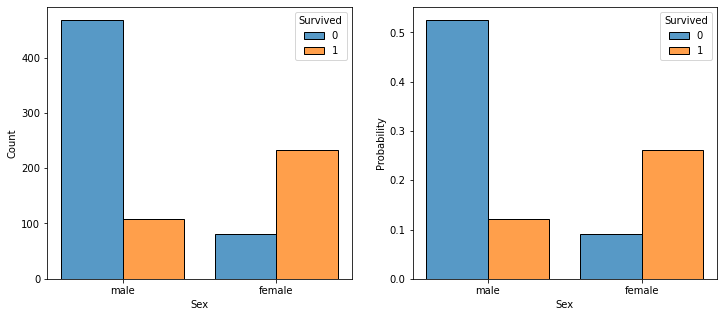

In [8]:
# Maneira alternativa usando a biblioteca seaborn - NOVO!

import seaborn as sns

#seaborn é uma biblioteca muito útil para o dia a dia do cientista de dados.
# ele possui diferentes tipos de gráficos para visualização estatística.

# ref.: https://seaborn.pydata.org/

fig, axs = plt.subplots(1,2, figsize=[12,5])

sns.histplot(df, x='Sex', hue='Survived', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

#stat='count' : conta a quantidade de cada sexo de acordo com a sobrevivencia

sns.histplot(df, x='Sex', hue='Survived', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

#stat='probability' : calcula a probabilidade de cada sexo de acordo com a sobrevivencia

**Qual conclusão você reforça com esses gráficos?**

#### d) Calcular o chi-quadrado

1) obter a distribuicao geral da variavel Survived;

2) obter a tabela de frequencia para os dados observados:

    - tabela de frequencia absoluta;
    - tabela de frequencia relativa.

3) adicionar o total na tabela de frequencia absoluta;

4) obter a tabela de frequência esperada:

    - caso as duas variáveis não tivesse relação.
    
5) cálculo do chi-quadrado:

Observado menos o esperado - desvio: $o_i - e_i$
    
Desvio ao quadrado: $\sigma^2 = (o_i - e_i)^2$

Chi-quadrado: $X^2 = (o_i - e_i)^2 / e_i$
   

In [15]:
# 1) Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [49]:
# 2) Tabelas de frequencia absoluta e relativa:

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_prob

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [51]:
# 3) Adicionar o total para cada sexo na tabela de frequência absoluta:

df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [52]:
# 4) Tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [101]:
# 5) Cálculo do chi-quadrado

# calculo dos desvios:

desvios = np.array([df_sex.iloc[0,:2].values-df_esp.iloc[0].values,df_sex.iloc[1,:2].values-df_esp.iloc[1].values])

print(desvios)

# calculo dos desvios ao quadrado:

desvios_ao_quadrado = desvios*desvios

# calculo do chi-quadrado:

chi_quad = np.sum((desvios*desvios)/np.array(df_esp))

print("\nO chi-quadrado de Pearson é de:", chi_quad)

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303


**O que significa o valor do chi-quadrado de Pearson?**

**Quais foram as suas conclusões?**

### Ex3: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:


1 - Qual o número de reclamações por Estado?

    - Calcular a quantidade de reclamações de acordo com os estados.

2 - Qual a quantidade de reclamações por sexo?

    - Calcular a quantidade de reclamações de acordo com o sexo do consumidor.

3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

    - Verificar a correlação entre o tempo de resposta e a nota atribuída pelo consumidor.
    - Importante verificar qual o tipo das duas variáveis para determinar o método estatístico.
    - Lembre-se que aqui você estará testando a seguinte hipótese: 
    
        - h0 = o tempo de resposta tem relação direta com a nota do consumidor. (Hipótese nula)
        - h1 = o tempo de resposta não tem relação direta com a nota do consumidor. (Hipótese alternativa)

4 - Proporção de reclamações registradas e não respondidas.

    - Calcular a proporção (porcentagem) do total de reclamações registradas que não foram respondidas.

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 

    - Proponha outras hipóteses e verifique-as (no mínimo duas).


**Importante**: É interessante que as análises contenham gráficos! No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.


_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [102]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [109]:
# Ex.3
# 1) Quantidade de reclamações por Estado
df['UF'].value_counts()

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

In [110]:
# Ex.3
# 2) Quantidade de reclamações por Sexo
df['Sexo'].value_counts()

M    27895
F    16092
Name: Sexo, dtype: int64

<AxesSubplot:xlabel='Tempo Resposta', ylabel='Probability'>

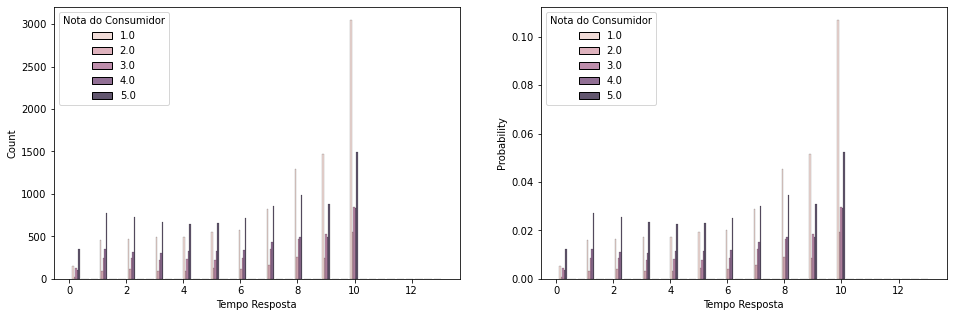

In [132]:
# Ex3
# 3) O tempo de resposta tem correlação com a nota do consumidor, 
#    devido a quantidade de notas do consumidor baixas atribuidas 
#    ser maior quando o tempo de resposta é maior.
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize=[16,5])

sns.histplot(df, x='Tempo Resposta', hue='Nota do Consumidor', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

sns.histplot(df, x='Tempo Resposta', hue='Nota do Consumidor', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

In [138]:
# Ex3
# 4) Proporção de reclamações registradas e não respondidas.
n_resp = round(df[(df.Respondida=='N')].shape[0] / df.shape[0],2)*100
print("\nA proporção de reclamações não atendidas é:", n_resp, "%")


A proporção de reclamações não atendidas é: 5.0 %


C:\Users\leonardo.maruyama\anaconda3\lib\site-packages\seaborn\_statistics.py:356: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()


<AxesSubplot:xlabel='Nota do Consumidor', ylabel='Probability'>

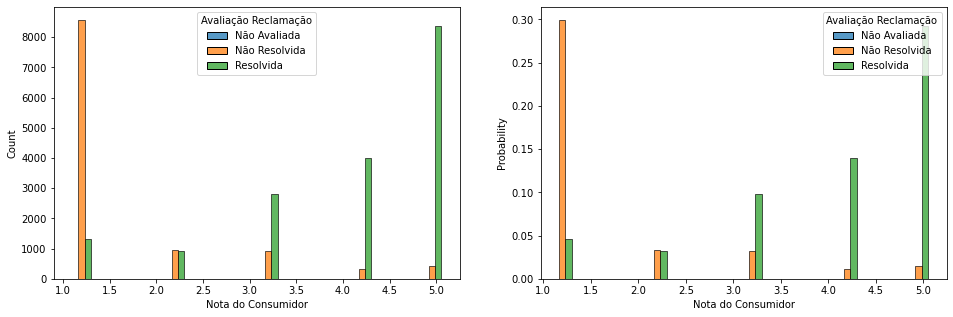

In [134]:
# Ex3
# 5) Pelo gráfico observa-se indica uma maior pontuação para reclamações atendidas 
#    e menor pontuação para reclamações não atendidas.
fig, axs = plt.subplots(1,2, figsize=[16,5])

sns.histplot(df, x='Nota do Consumidor', hue='Avaliação Reclamação', stat='count', multiple='dodge', shrink=0.8, ax=axs[0])

sns.histplot(df, x='Nota do Consumidor', hue='Avaliação Reclamação', stat='probability', multiple='dodge', shrink=0.8, ax=axs[1])

In [135]:
# Ex3
# 5) Pelo quantidade de reclamações distribuidas pelo Segmento de Mercado
#    observa-se que a maior quantidade de reclamações está concentrado no 
#    setor de telecomunicações, financeiras, e comércio eletrônica.
df['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    23962
Bancos, Financeiras e Administradoras de Cartão                             8809
Comércio Eletrônico                                                         6074
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       1725
Varejo                                                                      1008
Transporte Aéreo                                                             430
Corretoras e Sociedades de Seguros, Capitalização e Previdência              378
Fabricantes - Linha Branca                                                   367
Agências de Viagens                                                          324
Operadoras de Planos de Saúde e Administradoras de Benefícios                250
Supermercados                                                                205
Administradoras de Consórcios                                                139
Energia Elétrica, Gás, Água 